In [3]:
import numpy as np
from pandas import DataFrame
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras import layers, models, initializers
from tensorflow.keras.datasets import mnist

np.random.seed(20190228)
tf.random.set_seed(20190228)

In [4]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape(
                  (len(train_images), 784)).astype('float32') / 255
test_images = test_images.reshape(
                  (len(test_images), 784)).astype('float32') / 255
train_labels = tf.keras.utils.to_categorical(train_labels, 10)
test_labels = tf.keras.utils.to_categorical(test_labels, 10)

In [5]:
model = models.Sequential()
# kernel_initializer => TruncatedNormal : 一次関数のウェイトを乱数で初期化
model.add(layers.Dense(1024, activation='relu', input_shape=(28*28,),
                       kernel_initializer=initializers.TruncatedNormal(),
                       name='hidden'))
model.add(layers.Dense(10, activation='softmax', name='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden (Dense)               (None, 1024)              803840    
_________________________________________________________________
softmax (Dense)              (None, 10)                10250     
Total params: 814,090
Trainable params: 814,090
Non-trainable params: 0
_________________________________________________________________


In [6]:
model.compile(optimizer="adam",
             loss="categorical_crossentropy",
             metrics=["acc"])

In [8]:
history = model.fit(train_images, train_labels,
                   validation_data=(test_images, test_labels),
                   batch_size=128, epochs=10)

Epoch 1/10
469/469 [==============================] - 2s 5ms/step - loss: 0.2359 - acc: 0.9316 - val_loss: 0.1189 - val_acc: 0.9659
Epoch 2/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0910 - acc: 0.9726 - val_loss: 0.0865 - val_acc: 0.9728
Epoch 3/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0578 - acc: 0.9829 - val_loss: 0.0681 - val_acc: 0.9790
Epoch 4/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0390 - acc: 0.9881 - val_loss: 0.0682 - val_acc: 0.9783
Epoch 5/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0270 - acc: 0.9919 - val_loss: 0.0574 - val_acc: 0.9837
Epoch 6/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0186 - acc: 0.9949 - val_loss: 0.0626 - val_acc: 0.9812
Epoch 7/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0141 - acc: 0.9962 - val_loss: 0.0634 - val_acc: 0.9795
Epoch 8/10
469/469 [==============================] - 2s 4ms/step - loss: 0.

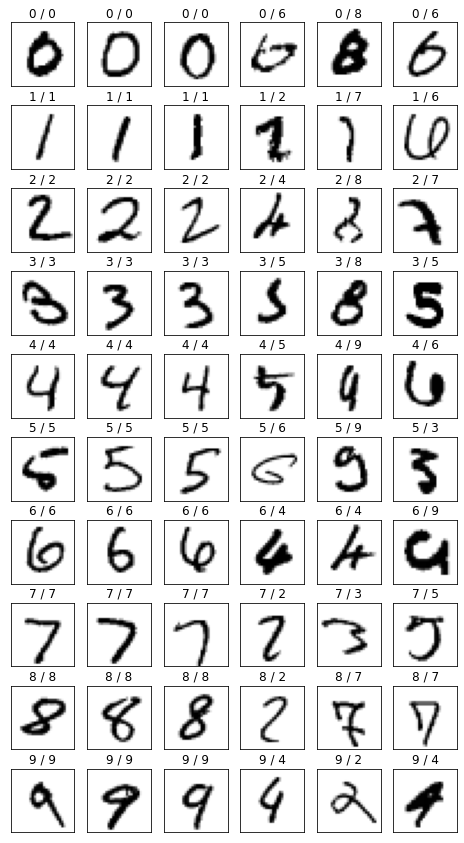

In [9]:
p_val = model.predict(np.array(test_images))
df = DataFrame({'pred': list(map(np.argmax, p_val)),
                'label': list(map(np.argmax, test_labels))})
correct = df[df['pred']==df['label']]
incorrect = df[df['pred']!=df['label']]

fig = plt.figure(figsize=(8, 15))
for i in range(10):
  indices = list(correct[correct['pred']==i].index[:3]) \
              + list(incorrect[incorrect['pred']==i].index[:3])
  for c, image in enumerate(test_images[indices]):
            subplot = fig.add_subplot(10, 6, i*6+c+1)
            subplot.set_xticks([])
            subplot.set_yticks([])
            subplot.set_title('%d / %d' % (i, df['label'][indices[c]]))
            subplot.imshow(image.reshape((28, 28)),
                           vmin=0, vmax=1, cmap=plt.cm.gray_r)